In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(720, 960, 3)


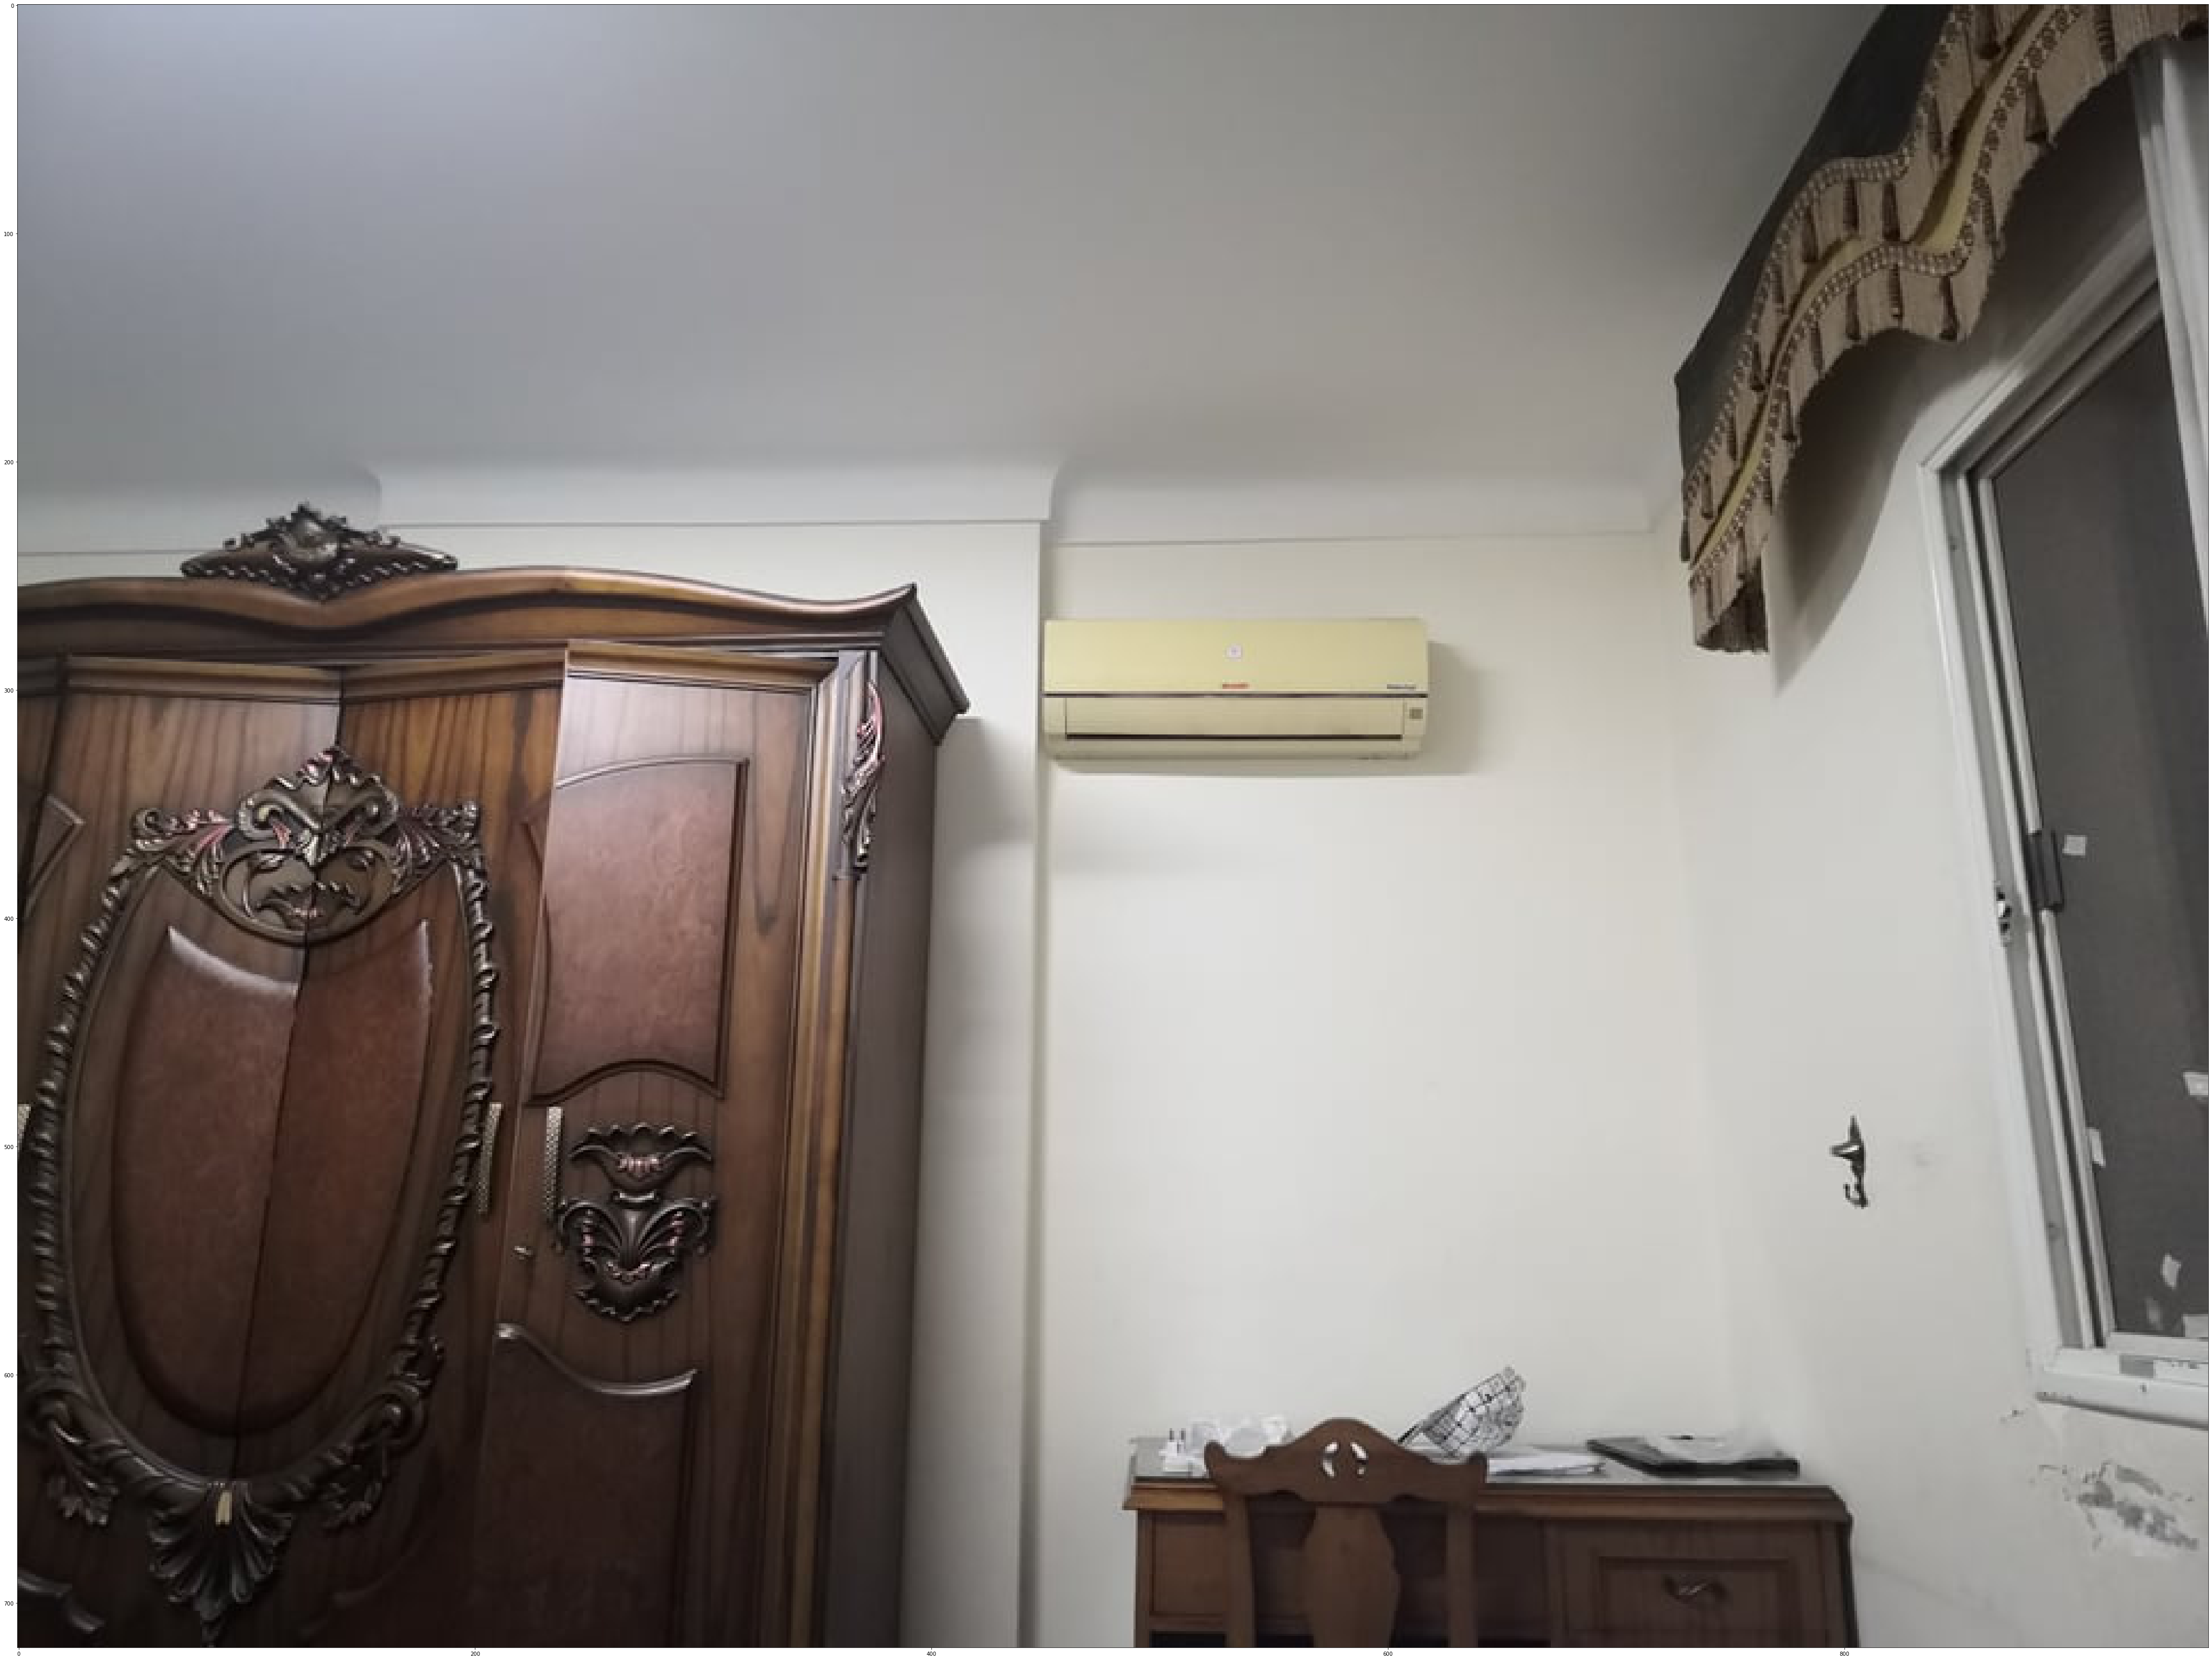

In [5]:
def show(img, size=75):
    print(img.shape)
    plt.figure(figsize = (size,size))
    
    if len(img.shape) == 2: # if grayscale, set cmap
        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    else: # if 3 channels, change from BGR to RGB
        plt.imshow(img[...,::-1])
        
    plt.show()

img = cv2.imread("./image_mosaics_1.jpg")
show(img)

## Finding The KeyPoints Using SIFT

In [6]:
def get_keypoints(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img,None)
    img_keypoints=cv2.drawKeypoints(img,kp,img)
    show(img_keypoints, 8)
    return kp, des

## Finding Correspondence

In [67]:
# Return correspondences in the following format:
# [

]

def get_correspondences(imgA, imgB):
    kp1, des1 = get_keypoints(imgA)
    kp2, des2 = get_keypoints(imgB)

    
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    
    # des1 = queryDescriptor, des2 = trainDescriptor
    matches = bf.knnMatch(des1,des2,k=2)
    
    # Apply ratio test
    good = []
    final_matches = []
    for m,n in matches:
        if m.distance < 0.15*n.distance:
            good.append([m])
            final_matches.append([kp1[m.queryIdx].pt, kp2[m.trainIdx].pt])
            
            
    # cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(imgA,kp1,imgB,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    show(img3)
    print(f"found {len(good)} matches")
    
    return final_matches

## Construct Homography Matrix

In [76]:
def construct_homography_matrix(matches):
    mat = [];
    
    for match in matches:
        xi = match[0][0]
        yi = match[0][1]
        
        xj = match[1][0]
        yj = match[1][1]
        
        mat.append([xi, yi, 1, 0, 0, 0, -1*xj*xi, -1*xj*yi, -1*xj])
        mat.append([0, 0, 0, xi, yi, 1, -1*yj*xi, -1*yj*yi, -1*yj])
        
    return mat

print(construct_homography_matrix([
    [(1,2), (3,4)]
]))

[[1, 2, 1, 0, 0, 0, -3, -6, -3], [0, 0, 0, 1, 2, 1, -4, -8, -4]]


(720, 960, 3)


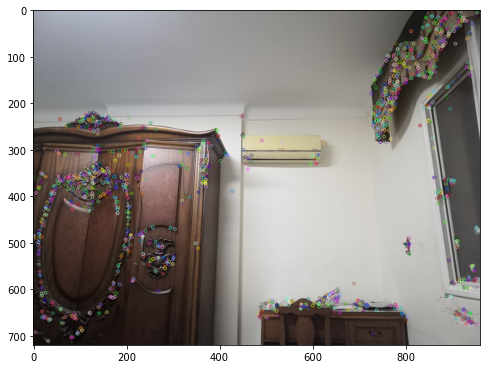

(720, 960, 3)


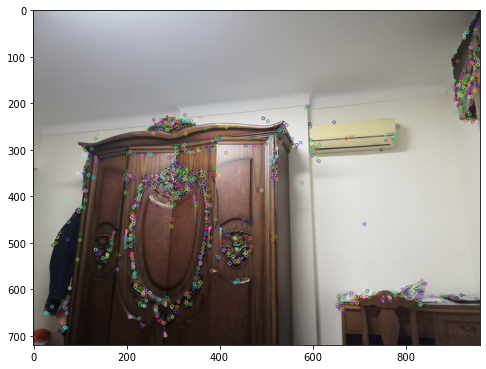

(720, 1920, 3)


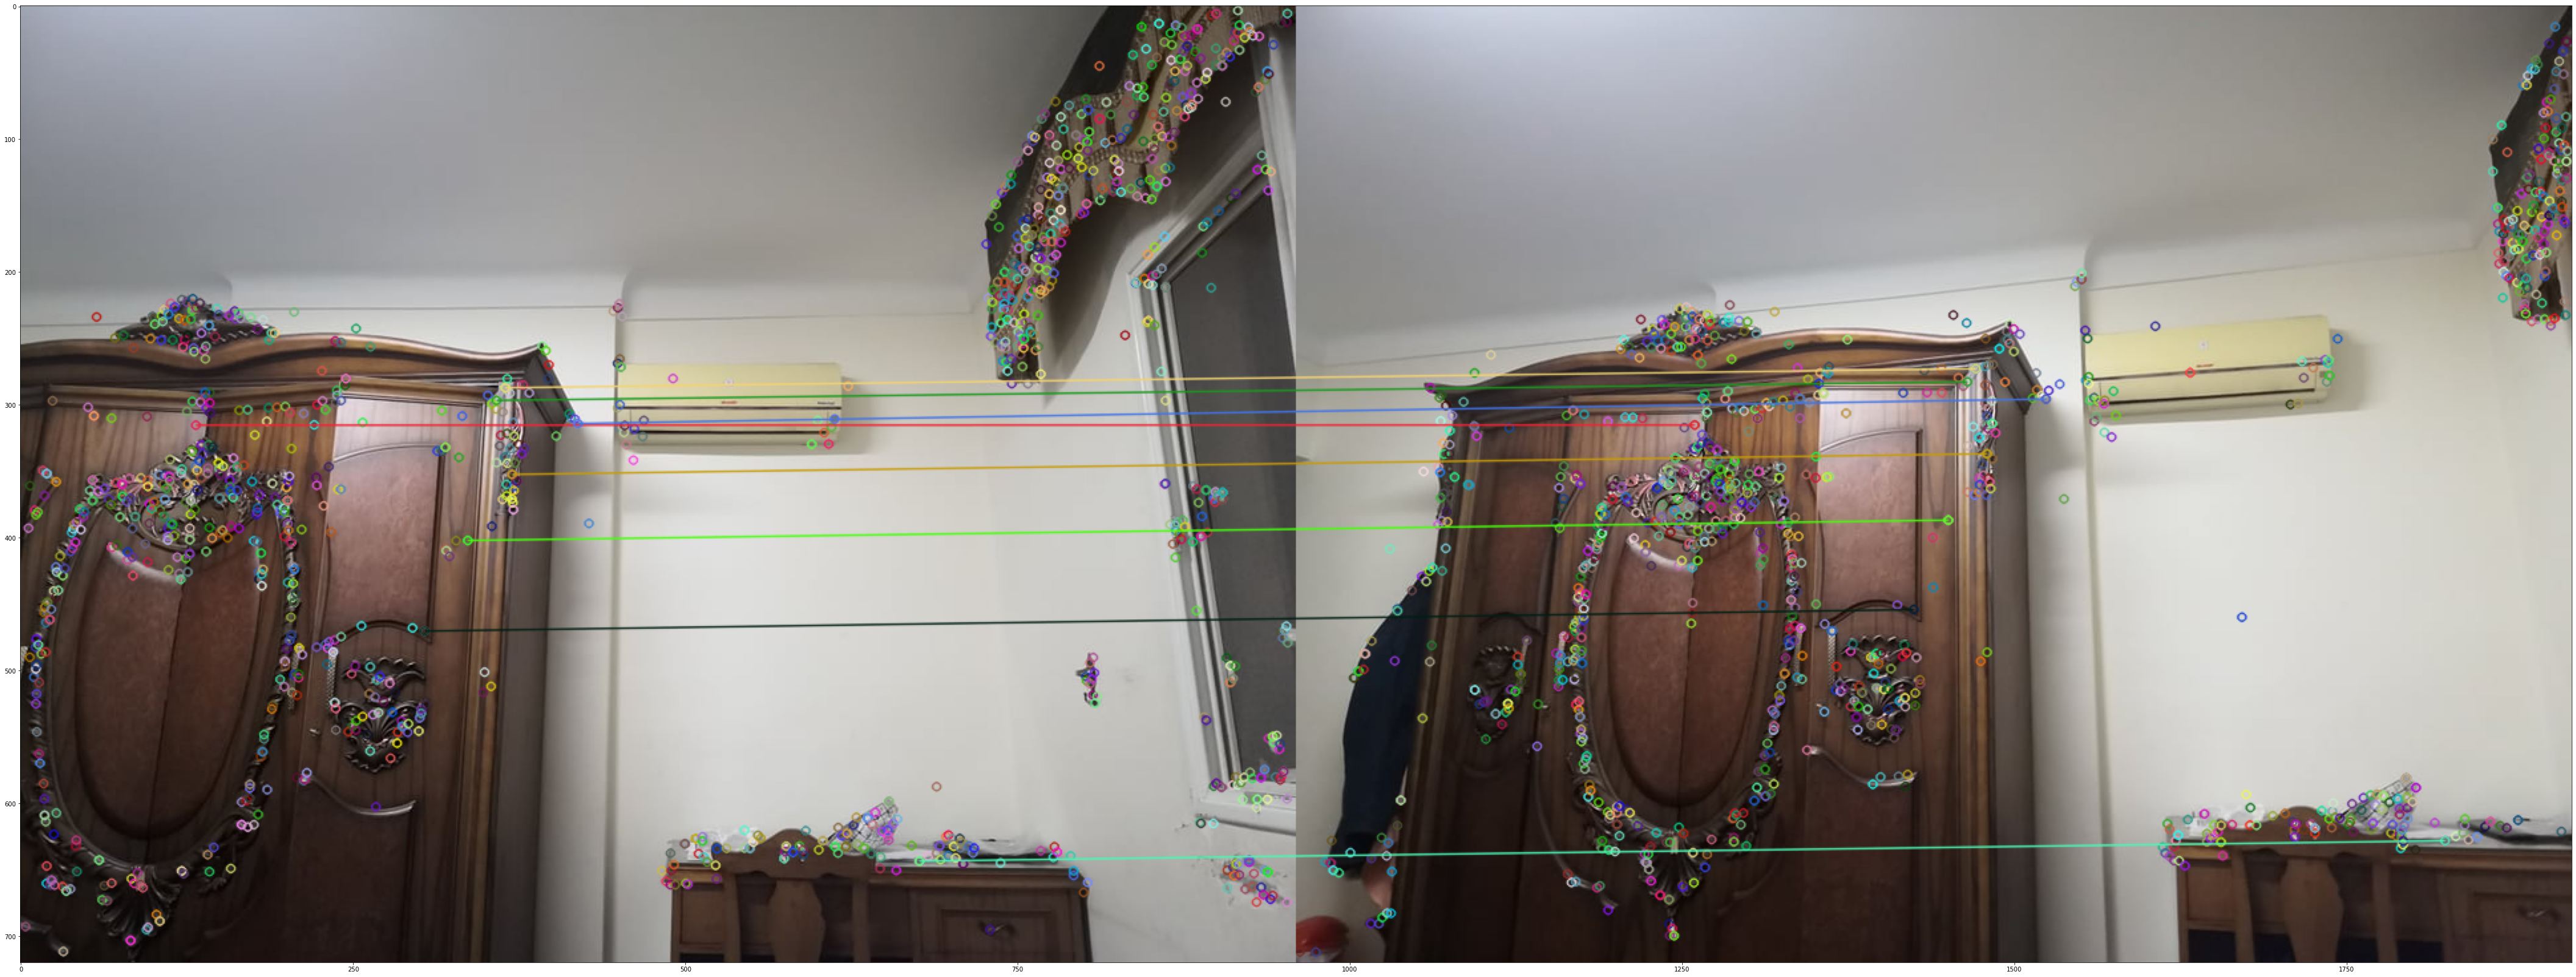

found 8 matches
[(131.7625732421875, 315.316650390625), (299.5826110839844, 315.1913757324219)]
[(304.0599670410156, 470.22344970703125), (464.4174499511719, 454.0855712890625)]
[(336.3775329589844, 402.0704345703125), (490.4495849609375, 386.77215576171875)]
[(357.9411315917969, 296.6597595214844), (504.81182861328125, 282.67413330078125)]
[(364.6415100097656, 287.19720458984375), (511.04180908203125, 272.8274230957031)]
[(369.768798828125, 352.3927917480469), (519.6524047851562, 336.8000793457031)]
[(419.1806640625, 314.08978271484375), (563.9195556640625, 295.6046142578125)]
[(676.2615966796875, 643.31396484375), (864.1887817382812, 628.0008544921875)]
(720, 960, 3)


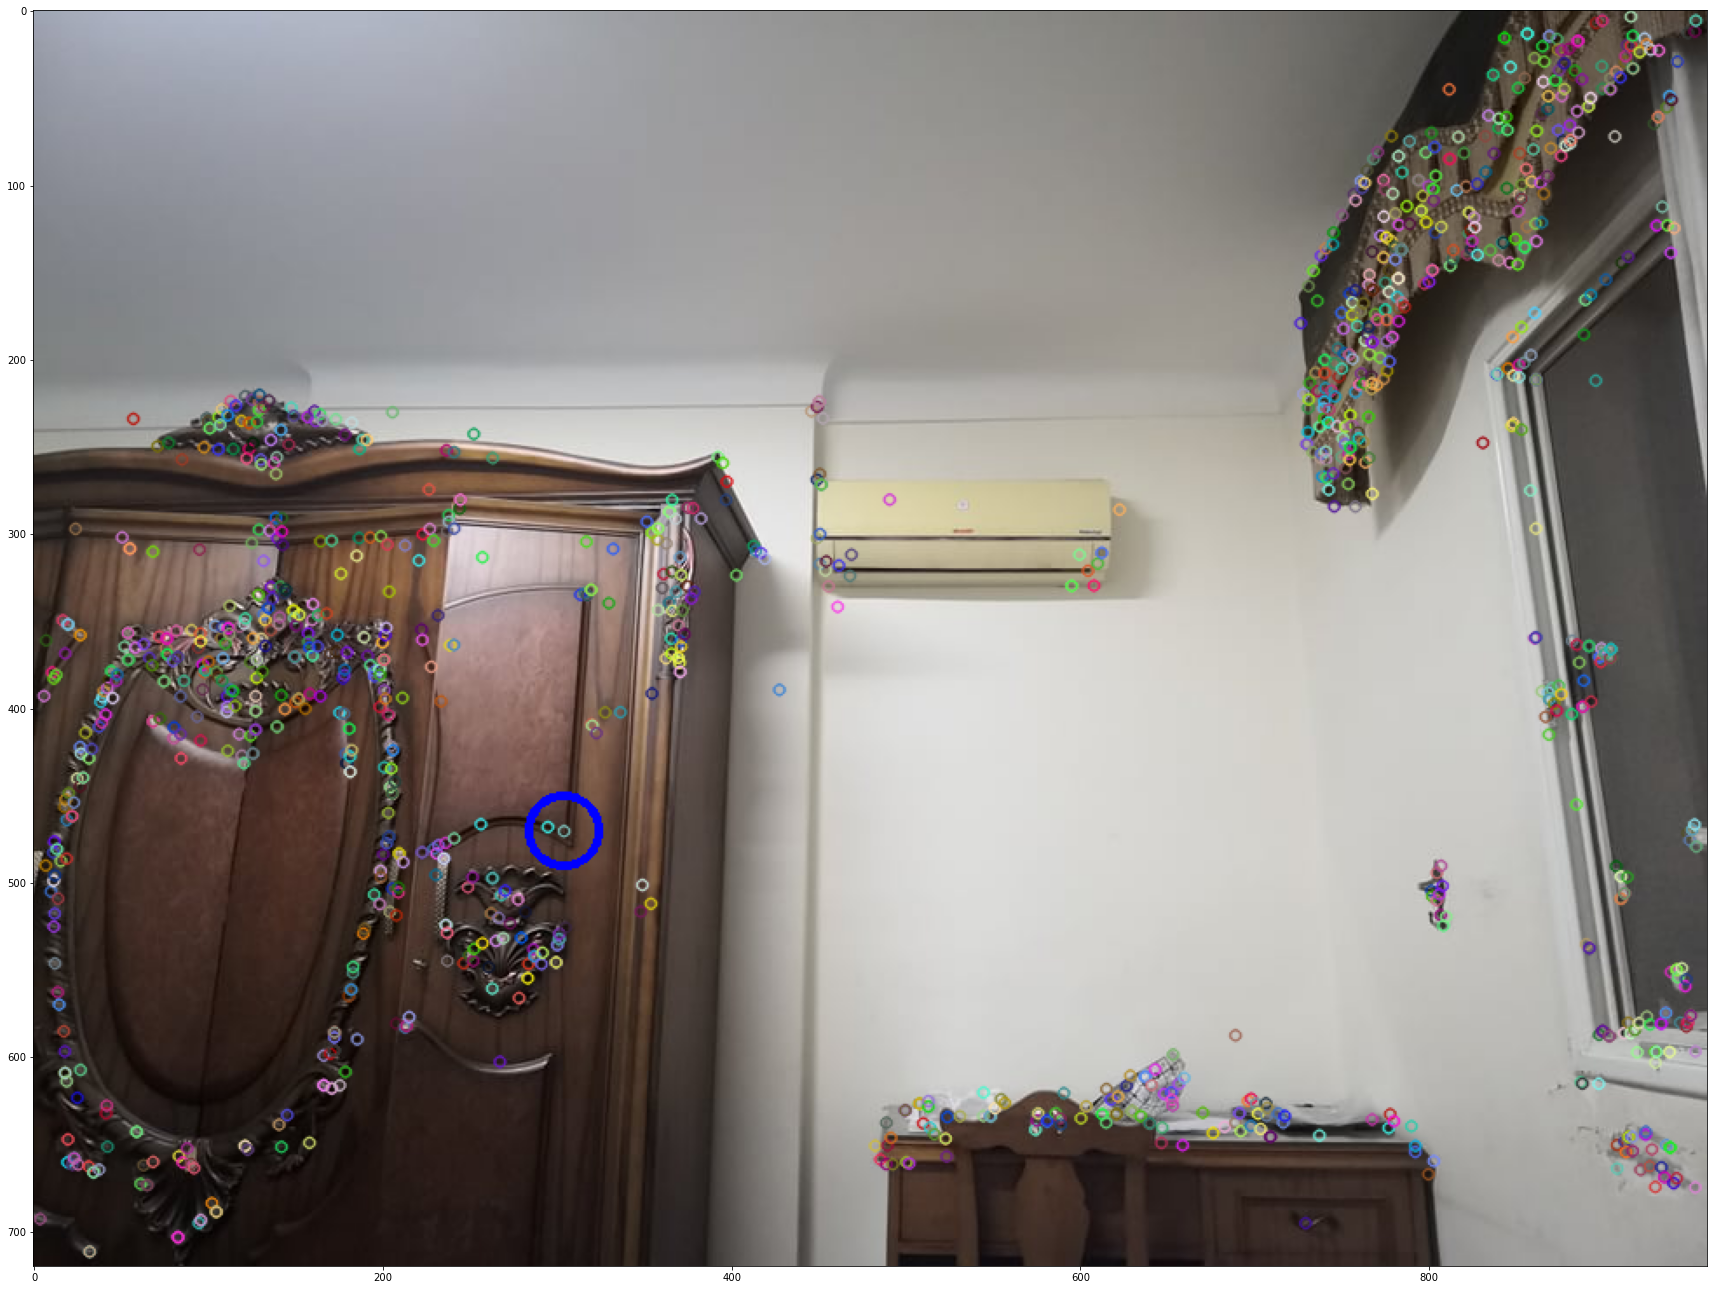

(720, 960, 3)


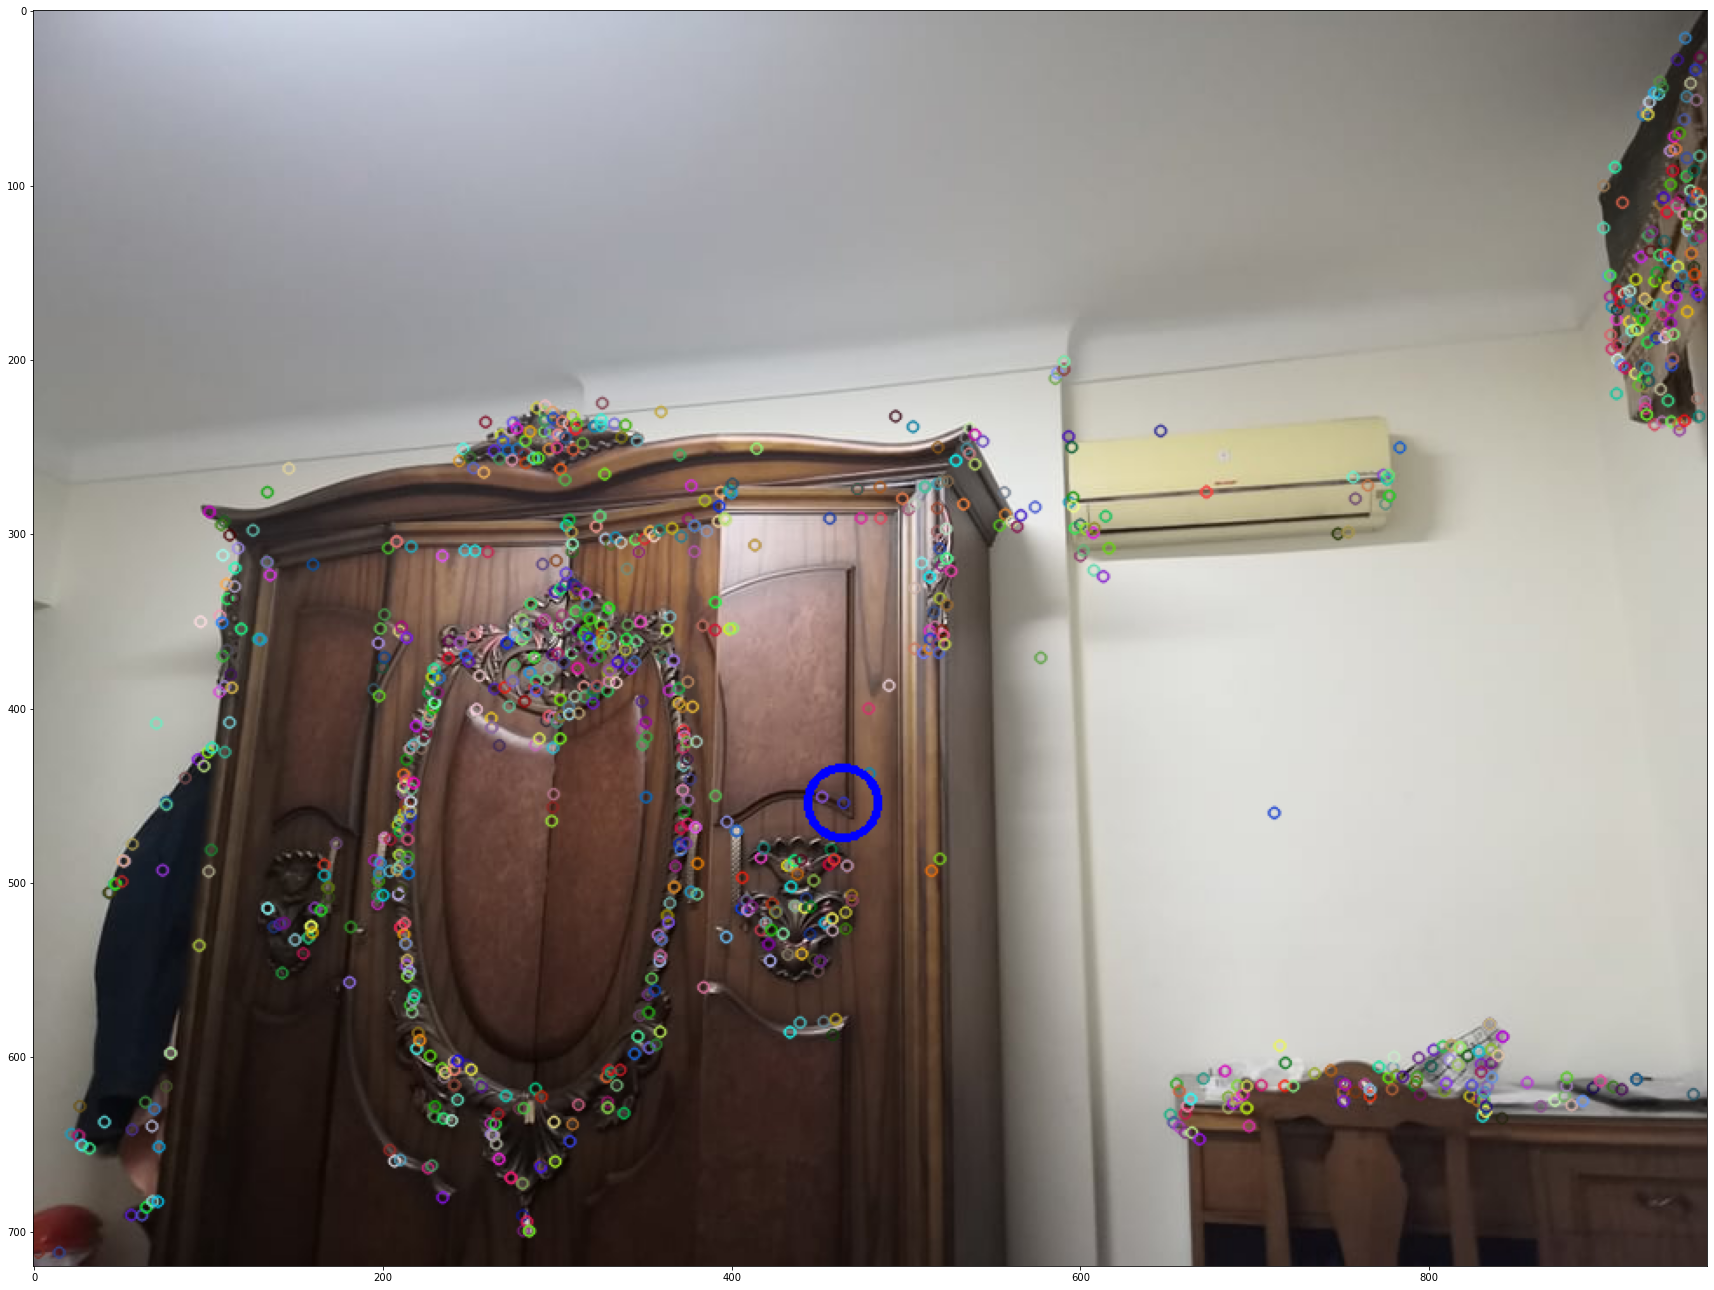

In [73]:
imgA = cv2.imread("./image_mosaics_1.jpg")
imgB = cv2.imread("./image_mosaics_2.jpg")


correspondences = get_correspondences(imgA, imgB)
construct_homography_matrix(correspondences)

pointA = correspondences[1][0]
pointB = correspondences[1][1]
imgA = cv2.circle(imgA, (int(pointA[0]), int(pointA[1])), 20, (255,0,0), 4)
imgB = cv2.circle(imgB, (int(pointB[0]), int(pointB[1])), 20, (255,0,0), 4)

show(imgA, 30)
show(imgB, 30)